## 2D heat distribution of a laser

In [3]:
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [15]:
T0 = 300 # original/ambient temperature, K
q = 840 # heat flux w/m^2
k = 35 # heat conductivity w/m/K
v = 1000 / 1000 / 60  # laser speed [m/s] # velocity m/s
cp = 800 # specific heat J/kg/K
rho = 7600 # density kg/m^3

In [3]:
print(f'density is {rho}')
print(f'heat flux is {q}')

density is 7600
heat flux is 840


(-0.05, 0.05)

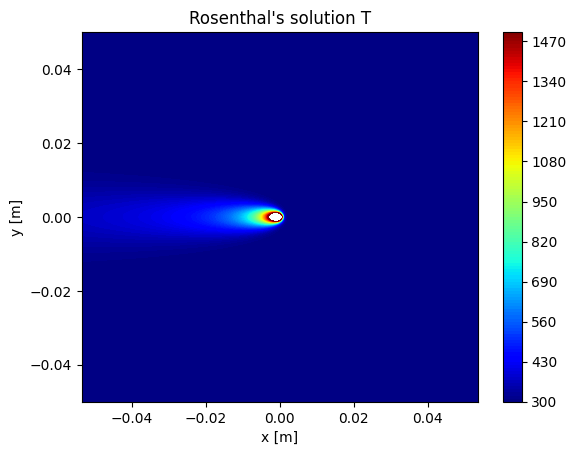

In [16]:
# grid size
nx = 1000
ny = 1000

import numpy as np # use numpy to speed the calcuation
import matplotlib.pyplot as plt # plot library
# define T as an array
T = np.empty((nx, ny))

# create arrays for coordinates for points
x, y = np.meshgrid(np.linspace(-1, 1, nx) / 5, np.linspace(-1, 1, nx) / 5)  # [m]

# consider a steady case
alpha = k/rho/cp
#print(f' thermal {alpha}')
for i in range(nx):
    for j in range(ny):
        R = np.sqrt(x[i,j]**2 + y[i,j]**2)
        #T[i,j] = T0 + q/(2*np.pi*k*R)*np.exp(-v*(x[i,j]+R)/2/alpha)
        T[i, j] = T0 + q / (2 * np.pi * k * R) * np.exp(-v * (x[i,j] + R) / (2 * alpha))

# plot the temperature
C = plt.contourf(x, y, T, levels=np.arange(T0, 1510, 10), cmap='jet')
plt.colorbar(C)
plt.axis('equal')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Rosenthal\'s solution T')
plt.xlim([-0.05, 0.05])
plt.ylim([-0.05, 0.05])